### **Optimización en Diseño Estructural (Columnas)**

El proyecto en cuestión es desarrollado por una empresa de ingeniería estructural, la cual enfrenta como reto resolver la falta de coherencia en las secciones de columnas en sus proyectos de pórticos de concreto reforzado. Este desafío es abordado como un proyecto de inteligencia artificial, cuyo objetivo es también optimizar los tiempos de entrega de los proyectos. Para enfrentar esta problemática, se propone como alternativa eficiente realizar un análisis comparativo de estructuras similares, considerando variables como las secciones de columnas, la resistencia del concreto, los tipos de suelo, la cantidad de pisos, las áreas, los tipos de losas y la normativa de diseño.

En este contexto, se plantea una pregunta SMART para delimitar la propuesta inicial de la solución basada en inteligencia artificial:

¿Cuál es el porcentaje mínimo de columnas con secciones de 40 cm x 100 cm y una resistencia de 280 kgf/cm², necesario para una estructura residencial de 11 pisos en Rionegro, Antioquia, para cumplir con todos los requisitos de desplazamiento, resistencia global, estabilidad y ductilidad establecidos en la NSR-10, considerando también las condiciones específicas del suelo y las cargas sísmicas?

In [59]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency


In [60]:
# Carga de base de datos para el análisis
df_uno = pd.read_excel('datos_1.xlsx')
df_dos = pd.read_excel('datos_2.xlsx')

# Se unen los datos en una sola tabla
df = pd.merge(df_uno, df_dos, on='id_estructura', how='inner')
print(df)



      id_estructura tipo_losa municipio tipo_espectro   tipo_suelo  \
0         360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100   
1         360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100   
2         360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100   
3         360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100   
4         360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100   
...             ...       ...       ...           ...          ...   
36080     383-22_E4    Maciza  Rionegro        NSR-10            C   
36081     383-22_E4    Maciza  Rionegro        NSR-10            C   
36082     383-22_E4    Maciza  Rionegro        NSR-10            C   
36083     383-22_E4    Maciza  Rionegro        NSR-10            C   
36084     383-22_E4    Maciza  Rionegro        NSR-10            C   

       cant_pisos    tipo_uso  area_total grad_disp_ener   STORY  Line  \
0               3  Zona Común        1467            DMO  STORY3   C30   
1          

Teniendo en cuenta la pregunta SMART mencionada, se ha decidido llevar a cabo un estudio detallado de las secciones de columnas utilizadas en diversos proyectos de pórticos de concreto reforzado ejecutados por la empresa. Este análisis permitirá identificar patrones y tendencias en el diseño estructural, proporcionando información valiosa para la optimización de futuros proyectos.

Descripción de los Campos

El conjunto de datos en análisis contiene columnas que van proporcionando información detallada sobre cada una de las caracteristicas principales de las estructuras en estudio. A continuación, se describen los campos disponibles:

- id_estructura: Se refiere al identificador interno asignado por la empresa a cada una de las estructuras.
- tipo_losa: Indica el tipo de losa que se utilizó en la estructura.
- municipio: Describe la ubicación geográfica de la estructura.
- tipo_espectro: Hace referencia al tipo de espectro utilizado para el diseño de la estructura.
- tipo_suelo: Indica el tipo de suelo sobre el que se va a cimentar la estructura.
- cant_pisos: Representa la cantidad de pisos con los que cuenta la estructura.
- tipo_uso: Describe el uso estructural que tendrá el proyecto.
- area_total: Especifica el área total en planta que abarca la estructura.
- grad_dis_ener: Indica el grado de disipación de energía con el que se diseñaron los elementos estructurales.
- Elementos_ETABS: Estas son unas tablas anidadas en cada estructura que proporcionan información sobre los elementos estructurales utilizados en cada una de ellas.
- STORY: Indica el piso al que pertenece el elemento estructural.
- Line: Es la nomenclatura utilizada para identificar el elemento estructural dentro de su respectivo proyecto.
- LineType: Representa el tipo de elemento estructural (por ejemplo, columna, viga o arriostramiento).
- SectionType: Describe el tipo de sección geométrica del elemento estructural (como rectangular o circular).
- AnalysisSect: Detalla la geometría y la resistencia del elemento estructural.

### **Análisis Exploratorio**

Se procede a verificar que los datos disponibles cuenten con la consistencia y el formato adecuado para llevar a cabo el análisis. Este paso es esencial para garantizar la integridad y la precisión de los resultados obtenidos durante el estudio.

In [61]:
# Mostrar el tamaño de los datos
df.shape

(36085, 14)

Para la tabla principal se cuenta con 36085 observaciones y 14 columnas.

In [62]:
# Mostrar las primeras filas del dataframe
print(df.head())

  id_estructura tipo_losa municipio tipo_espectro   tipo_suelo  cant_pisos  \
0     360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100           3   
1     360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100           3   
2     360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100           3   
3     360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100           3   
4     360-21_E4   Nervada    Bogotá         Sitio  Aluvial 100           3   

     tipo_uso  area_total grad_disp_ener   STORY Line LineType  SectionType  \
0  Zona Común        1467            DMO  STORY3  C30   Column  Rectangular   
1  Zona Común        1467            DMO  STORY3  C31   Column  Rectangular   
2  Zona Común        1467            DMO  STORY3  C32   Column  Rectangular   
3  Zona Común        1467            DMO  STORY3  C33   Column  Rectangular   
4  Zona Común        1467            DMO  STORY3  C34   Column  Rectangular   

  AnalysisSect  
0   C30X50H280  
1   C40X40H280  
2   C

Se puede observar una muestra de los datos con los que se va a trabajar.

In [63]:
df.isna().sum()

id_estructura         0
tipo_losa             0
municipio             0
tipo_espectro         0
tipo_suelo            0
cant_pisos            0
tipo_uso              0
area_total            0
grad_disp_ener        0
STORY                 0
Line                  0
LineType              0
SectionType       14745
AnalysisSect          0
dtype: int64

Se puede ver que la columna "SectionType" cuenta con 14745 observaciones vacías. En el proceso de limpieza se decidirá qué hacer con estas observaciones.

In [64]:
list(df.columns)

['id_estructura',
 'tipo_losa',
 'municipio',
 'tipo_espectro',
 'tipo_suelo',
 'cant_pisos',
 'tipo_uso',
 'area_total',
 'grad_disp_ener',
 'STORY',
 'Line',
 'LineType',
 'SectionType',
 'AnalysisSect']

Las columnas representan la descripción de los atributos del conjunto de datos mencionado anteriormente. De todas estas columnas, la última columna (AnalysisSect) es la variable objetivo, ya que contiene información sobre todos los elementos estructurales utilizados para cada una de las estructuras que están bajo estudio.

Ahora procederemos a analizar cómo se distribuye esta variable.

In [65]:
(df.value_counts('AnalysisSect',normalize=True)*100).round(2).astype(str)+'%'

AnalysisSect
V40X50H210    4.92%
V20X40H280    4.24%
V40X45H280    3.99%
V40X45H210    3.95%
N20X40H245    3.37%
              ...  
V52X80H210     0.0%
V50X63H210     0.0%
V50X65H280     0.0%
V50X80H210     0.0%
V50X80H280     0.0%
Name: proportion, Length: 353, dtype: object

Se observa que la variable objetivo contiene 353 tipos diferentes, entre los cuales las secciones tipo "beam" son las que presentan la mayor cantidad. Ahora bien, debido a que la idea es evaluar las variables que son del tipo "Column", ahora se hace un ajuste en la programación para verificar cuales secciones de tipo "column" son las que tienen mayor porcentaje de utilización dentro de todas las estructuras.

In [66]:
# Filtrar solo las filas donde LineType sea 'column'
df = df[df['LineType'] == 'Column']

# Mostrar las secciones correspondientes en AnalysisSect
(df.value_counts('AnalysisSect',normalize=True)*100).round(2).astype(str)+'%'

AnalysisSect
C40X100H350      7.53%
C40X100H280      7.15%
C40X70H280       4.97%
C40X70H210       4.91%
C30X80H280       3.48%
                 ...  
C80X40H420       0.02%
CL3H420          0.02%
COL110X40H420    0.02%
CT2H420          0.02%
P40X50H280       0.02%
Name: proportion, Length: 151, dtype: object

In [67]:
df.shape

(5256, 14)

Se observa que la variable objetivo contiene las secciones 'C40X100H350' y 'C40X100H280' como las de mayor frecuencia en la lista de 5256 datos. Además, se ha identificado que algunos elementos presentan una nomenclatura diferente a la esperada para este tipo de elementos. Generalmente, cuando se trata de un elemento tipo 'Column', la nomenclatura debería comenzar con 'C', seguida de la descripción geométrica de la sección, y finalizada con la resistencia de la sección. Debido a esta inconsistencia, se prevé realizar un ajuste en la nomenclatura durante el procesamiento de los datos para asegurar la integridad y consistencia de la información.

Teniendo en cuenta los resultados obtenidos, se ha decidido llevar a cabo un estudio detallado de las secciones de columnas en relación con los pisos utilizados en diversos proyectos de pórticos de concreto reforzado ejecutados por la empresa. Este análisis tiene como objetivo identificar patrones y tendencias en el diseño estructural, proporcionando información valiosa para la optimización de futuros proyectos.

Es relevante destacar que las dos variables mencionadas anteriormente son de tipo ‘categóricas’. Dado este contexto, una forma efectiva de obtener un análisis significativo de estas variables es mediante el uso de una tabla de contingencia. Esta tabla proporcionará información sobre la cantidad de columnas utilizadas por piso para cada una de las secciones presentes en el proyecto. Además del uso de las tablas mencionadas anteriormente, también se prevé usar el test de chi-cuadrado con el fin de probar la independencia entre las variables. Por último, se utilizará el coeficiente V de Cramer para medir la fuerza de asociación entre las variables a evaluar.

A continuación, se presenta la tabla de contingencia para la totalidad de los datos de tipo ‘column’ en el proyecto.


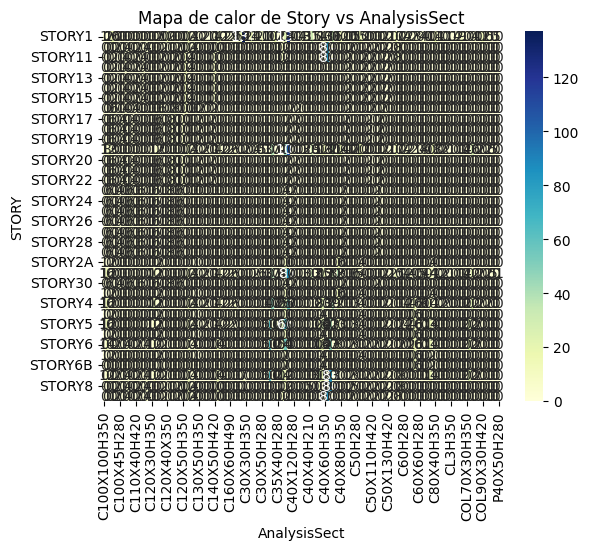

In [68]:
# Se procede a revisar la relación entre dos variables categoricas del dataset por medio de una tabla de contingencia
pd.crosstab(df['STORY'], df['AnalysisSect'])

# Visualización 
crosstab = pd.crosstab(df['STORY'], df['AnalysisSect'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de calor de Story vs AnalysisSect')
plt.show()

Al observar la visualización gráfica de lo descrito anteriormente, se concluye que no es posible realizar un análisis adecuado de las dos variables mencionadas, ya que ambas variables presentan diferentes tipos de categorías que corresponden a distintos tipos de proyectos. Por ende, es importante tener presente que, si se desea continuar analizando los datos, una forma correcta de hacerlo sería especificando más las condiciones para algún tipo de proyecto en particular. Por esta razón, a manera de ejemplo se ha decidido especificar más las características para una estructura concreta, con el objetivo de facilitar la visualización de los datos y lograr un análisis más preciso. En este caso particular, se opta por examinar las estructuras ubicadas en el municipio de Rionegro, con los siguientes atributos: losa de tipo maciza, espectro de diseño según la NSR-10, suelo de tipo C, uso mixto y un total de 11 pisos.

Considerando el filtro previamente mencionado, se inicia la búsqueda de las estructuras dentro de la base de datos que cuentan con la información proporcionada.

In [69]:
# Aplicar el filtro
filtro = (df['municipio'] == 'Rionegro') & \
         (df['tipo_losa'] == 'Maciza') & \
         (df['tipo_espectro'] == 'NSR-10') & \
         (df['tipo_suelo'] == 'C') & \
         (df['cant_pisos'] == 11) & \
         (df['tipo_uso'] == 'Mixto')

df_filtrado = df[filtro]

print(df_filtrado)


      id_estructura tipo_losa municipio tipo_espectro tipo_suelo  cant_pisos  \
25556     383-22_E1    Maciza  Rionegro        NSR-10          C          11   
25557     383-22_E1    Maciza  Rionegro        NSR-10          C          11   
25558     383-22_E1    Maciza  Rionegro        NSR-10          C          11   
25559     383-22_E1    Maciza  Rionegro        NSR-10          C          11   
25560     383-22_E1    Maciza  Rionegro        NSR-10          C          11   
...             ...       ...       ...           ...        ...         ...   
34330     383-22_E4    Maciza  Rionegro        NSR-10          C          11   
34331     383-22_E4    Maciza  Rionegro        NSR-10          C          11   
34332     383-22_E4    Maciza  Rionegro        NSR-10          C          11   
34333     383-22_E4    Maciza  Rionegro        NSR-10          C          11   
34334     383-22_E4    Maciza  Rionegro        NSR-10          C          11   

      tipo_uso  area_total grad_disp_en

Ahora, se realiza una tabla de contingencia para la información filtrada

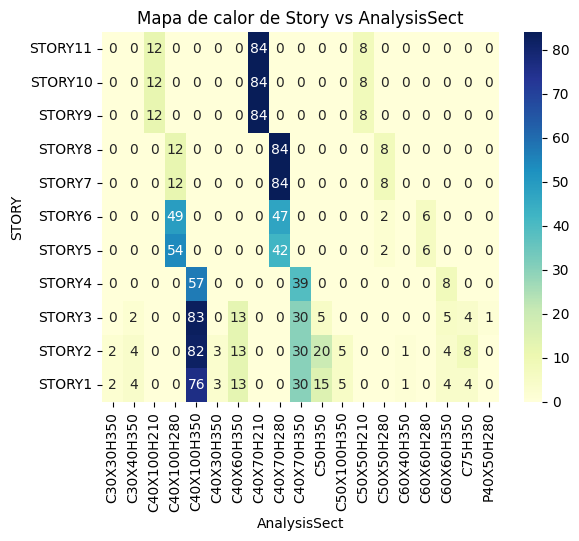

In [74]:
# Ordenar el DataFrame por la columna 'Story' en orden ascendente
df_filtrado['STORY'] = pd.Categorical(df_filtrado['STORY'], categories=[f'STORY{i}' for i in range(11, 0, -1)], ordered=True)
df_filtrado = df_filtrado.sort_values('STORY')

# Se procede a revisar la relación entre dos variables categoricas del dataset por medio de una tabla de contingencia
pd.crosstab(df_filtrado['STORY'], df_filtrado['AnalysisSect'])

# Visualización 
crosstab = pd.crosstab(df_filtrado['STORY'], df_filtrado['AnalysisSect'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Mapa de calor de Story vs AnalysisSect')
plt.show()

Ahora bien, la gráfica anterior permite un mejor análisis de los datos. En este caso, se observa que las columnas con una sección de 40 cm x 100 cm y una resistencia de concreto de 350 kgf/cm² son las más utilizadas en los cuatro primeros niveles de las estructuras. Entre los niveles cinco y seis, predominan las columnas con una sección de 40 cm x 100 cm y una resistencia de concreto de 280 kgf/cm². Asimismo, entre los niveles siete y ocho, las columnas con una sección de 40 cm x 70 cm y una resistencia de concreto de 280 kgf/cm² son las más comunes. Sin embargo, resulta inusual que el piso dos cuente con más elementos en comparación con el piso uno. En consecuencia, se considerará esta información durante el procesamiento de los datos para su limpieza en caso de que existan errores o para realizar modificaciones según sea necesario.

Continuando, ahora se procede a verificar la independencia de las variables.

In [71]:
# Realiza el test de chi-cuadrado sobre la tabla de contingencia
chi2, p, dof, expected = chi2_contingency(crosstab)

# Muestra los resultados
print(f"Estadístico chi-cuadrado: {chi2}")
print(f"p-valor: {p}")


Estadístico chi-cuadrado: 3069.127444871551
p-valor: 0.0


Dado el alto valor del estadístico chi-cuadrado y el p-valor extremadamente bajo, podemos concluir que existe una relación significativa entre las variables “STORY” y “AnalysisSect”. Esto sugiere que las secciones de columna cambian de manera significativa en función de los diferentes pisos de la estructura. Además, es importante tener presente que este análisis indica que hay variabilidad en las secciones de columnas a lo largo de los pisos, lo cual es coherente con las prácticas de diseño estructural, ya que las cargas varían entre los niveles.

Asimismo, se procede a examinar la correlación entre las dos variables con el objetivo de evaluar la influencia que una puede tener sobre la otra.

In [72]:
# Analisis de correlación para variables categoricas

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return (chi2 / (n * (min(k, r) - 1))) ** 0.5

cramers_v(df['STORY'], df['AnalysisSect'])

np.float64(0.3854786642194361)

Aunque la asociación es débil, es importante considerar que en el diseño estructural, las secciones de columna pueden estar influenciadas por otros factores no considerados en este análisis, como las cargas específicas de cada piso, el uso del edificio y las normativas locales. Por ello, se considera pertinente realizar análisis adicionales, como la segmentación de los datos por tipo de proyecto o por otras características relevantes, para obtener una visión más detallada y precisa de las relaciones entre las variables.

### **Preparación de los Datos**

Teniendo en cuenta el análisis realizado anteriormente, se han identificado tres situaciones relevantes. En primer lugar, se observó una cantidad inusualmente mayor de elementos tipo ‘Column’ en el piso 2 en comparación con el piso 1. Esto contrasta con la tendencia general, donde normalmente se esperaría que los pisos superiores tuvieran menos elementos de este tipo que los pisos inferiores. En segundo lugar, se encontraron elementos con nomenclaturas completamente diferentes a las utilizadas en los proyectos habituales de la empresa en la variable ‘AnalysisSect’. Por último, se identificaron estructuras en las que la variable ‘SectionType’ no tiene un valor asignado. Con base en estas observaciones, se procederá a realizar una preparación exhaustiva de los datos para garantizar una mayor precisión al obtener resultados.

En relación al primer punto mencionado previamente, basándose en la experiencia con estos datos, se ha observado que, en general, los elementos tipo ‘Column’ se dividen en dos o más secciones con fines de modelado. Por ejemplo, se pueden agregar tramos de losa de entrepiso o, en el caso de estructuras inclinadas, se suelen cortar estos elementos mediante un plano de piso de referencia. Sin embargo, desde una perspectiva estructural, en nuestra oficina consideramos estos casos como si fueran un solo elemento. Por lo tanto, en el contexto de este ejercicio, se procederá a identificar y eliminar aquellos puntos que sean necesarios para lograr un ajuste más preciso de la cantidad total de elementos en la estructura.

In [82]:
df.isna().sum()

id_estructura        0
tipo_losa            0
municipio            0
tipo_espectro        0
tipo_suelo           0
cant_pisos           0
tipo_uso             0
area_total           0
grad_disp_ener       0
STORY                0
Line                 0
LineType             0
SectionType       1595
AnalysisSect         0
dtype: int64

In [95]:
# Definir las funciones de filtrado
def filtrar_terminados_en_1(df):
    return df[df['Line'].str.contains('-1$', na=False)]

def filtrar_sin_guion(df):
    return df[~df['Line'].str.contains('-', na=False)]

# Definir una función para concatenar DataFrames
def concatenar_dfs(df1, df2):
    return pd.concat([df1, df2], ignore_index=True)

# Limpiar los datos antes de aplicar el pipeline
# df = df.dropna(subset=['Line'])  # Eliminar filas donde 'Line' es NA/Nan

# Aplicar el pipeline
df_filtrados = filtrar_terminados_en_1(df)
df_sin_guion = filtrar_sin_guion(df)
df = concatenar_dfs(df_filtrados, df_sin_guion)


Respecto al segundo punto mencionado, se debe tener en cuenta que, como se destacó en el análisis univariado de las secciones de columnas del proyecto, la empresa utiliza una nomenclatura base para las columnas. Esto tiene el propósito de asegurar una sincronía en los proyectos. Con base en esta nomenclatura, se procede a identificar las secciones de columnas que presentan nomenclaturas diferentes y ajustarlas para mejorar la claridad y eficiencia en el procesamiento de los datos.

In [96]:
# Eliminar filas donde 'AnalysisSect' comienza con 'CL' o 'CT'
df = df[~df['AnalysisSect'].str.startswith(('CL', 'CT'))]

# Reemplazar palabras que comienzan con 'COL' por 'C'
df['AnalysisSect'] = df['AnalysisSect'].str.replace('^COL', 'C', regex=True)

Por otro lado, la variable "SectionType" presenta varias observaciones vacías. Esta variable es crucial ya que proporciona información sobre el tipo de sección geométrica de cada elemento. Para abordar este problema, es importante analizar la forma en que se nombran los elementos y buscar patrones o reglas que permitan inferir el tipo de sección. De esta manera, se podrá rellenar la información faltante y mejorar la claridad y consistencia de los datos relacionados con las secciones geométricas.

In [97]:
# Función para actualizar 'SectionType' basado en 'AnalysisSect'
def actualizar_section_type(row):
    if pd.isna(row['SectionType']):  # Verificar si 'SectionType' está vacío
        if 'X' in row['AnalysisSect']:  # Verificar si 'AnalysisSect' contiene 'X'
            return 'Rectangular'
        else:
            return 'Circle'
    else:
        return row['SectionType']

# Aplicar la función a cada fila del DataFrame
df['SectionType'] = df.apply(actualizar_section_type, axis=1)